## Bike Sharing Case Study

#### Problem Statement:
A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.So to accelerate its revenue as soon as the ongoing lockdown comes to an end, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

1. Reading, understanding and visualing the data
2. Preparing the data for modelling (train-test split, rescaling etc)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set

### Step 1: Reading, understanding and visualing the data

Let's start with the following steps:

- Import the required library's
- Importing data using the pandas library
- Data cleaning
- Understanding the structure of the data

In [125]:
# import the library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [126]:
# read data from .csv file

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- __cnt__ - Target variable
- __Rest all are__ - Predictive variables

In [127]:
df.shape

(730, 16)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [129]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [130]:
# check the missing values in column wise

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [131]:
# check the missing values in row wise

df.isnull().sum(axis= 1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [132]:
# data cleaning
# First we will remove instant variable as it's an index column

df.drop(['instant'], axis=1, inplace=True)

In [133]:
# As per the document, cnt: count of total rental bikes including both casual and registered
# so we will remove the casual & registered variables

df.drop(['casual','registered'], axis = 1, inplace=True)

In [134]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [135]:
# create a date dataset

df_date_data = df.loc[:,['yr','mnth','dteday']]
df_date_data.head()

,yr,mnth,dteday
0,0,1,01-01-2018
1,0,1,02-01-2018
2,0,1,03-01-2018
3,0,1,04-01-2018
4,0,1,05-01-2018


In [136]:
df_date_data.yr.unique()

array([0, 1])

In [137]:
df_date_data.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [138]:
# Here we can also remove 'dteday' column because it has no use for our analysis
# as we have already year and month maintained in dataset.

df.drop(['dteday'],axis=1,inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [140]:
print("season.unique() \t", df.season.unique())
print("yr.unique \t\t", df.yr.unique())
print("mnth.unique \t\t", df.mnth.unique())
print("holiday.unique \t\t", df.holiday.unique())
print("weekday.unique \t\t", df.weekday.unique())
print("workingday.unique \t", df.workingday.unique())
print("weathersit.unique \t", df.weathersit.unique())

season.unique() 	 [1 2 3 4]
yr.unique 		 [0 1]
mnth.unique 		 [ 1  2  3  4  5  6  7  8  9 10 11 12]
holiday.unique 		 [0 1]
weekday.unique 		 [6 0 1 2 3 4 5]
workingday.unique 	 [0 1]
weathersit.unique 	 [2 1 3]


## Here we will change non bool variable to object as per data-sheet 

### Bool variables
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- yr : year (0: 2018, 1:2019)
- holiday : weather day is a holiday or not 

### Non-bool variables
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week
- weathersit : 
		1. Clear, Few clouds, Partly cloudy, Partly cloudy
		2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [141]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### From data we can see that: 
    - season
    - mnth
    - weekday
    - weathersit
all are categorical variables. So, we can replace season, weekday and weathersit with appropriate values from the document sheet

In [142]:
# create a function which convert integer to string value as per document sheet.

def convert_season(x):
    return x.map(
        {
            1:'spring',
            2:'summer',
            3:'fall',
            4:'winter'
        })

def convert_month(x):
    return x.map(
        {
            1:"Jan",
            2:"Feb",
            3:"Mar",
            4:"Apr",
            5:"May",
            6:"Jun",
            7:"Jul",
            8:"Aug",
            9:"Sep",
            10:"Oct",
            11:"Nov",
            12:"Dec"
        })

def convert_weekday(x):
    return x.map(
        {
            0:"Sunday",
            1:"Monday",
            2:"Tuesday",
            3:"Wednesday",
            4:"Thursday",
            5:"Friday",
            6:"Saturday"
        })

def convert_weathersit(x):
    return x.map(
        {
            1:'Clear_Few_clouds',
            2:'Mist_Cloudy_Broken_Few_clouds',
            3:'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
            4:'Heavy_Rain_IcePallets_Thunderstorm_Mist_Snow_Fog'
        })

In [143]:
# convert interger value to string using function

season_to_convert = ['season']
df[season_to_convert] = df[season_to_convert].apply(convert_season)

mnth_to_convert = ['mnth']
df[mnth_to_convert] = df[mnth_to_convert].apply(convert_month)

weekday_to_convert = ['weekday']
df[weekday_to_convert] = df[weekday_to_convert].apply(convert_weekday)

weathersit_to_convert = ['weathersit']
df[weathersit_to_convert] = df[weathersit_to_convert].apply(convert_weathersit)


df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy_Broken_Few_clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy_Broken_Few_clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,Clear_Few_clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,Clear_Few_clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,Clear_Few_clouds,9.305237,11.46350,43.6957,12.522300,1600


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


#### Visualize the data

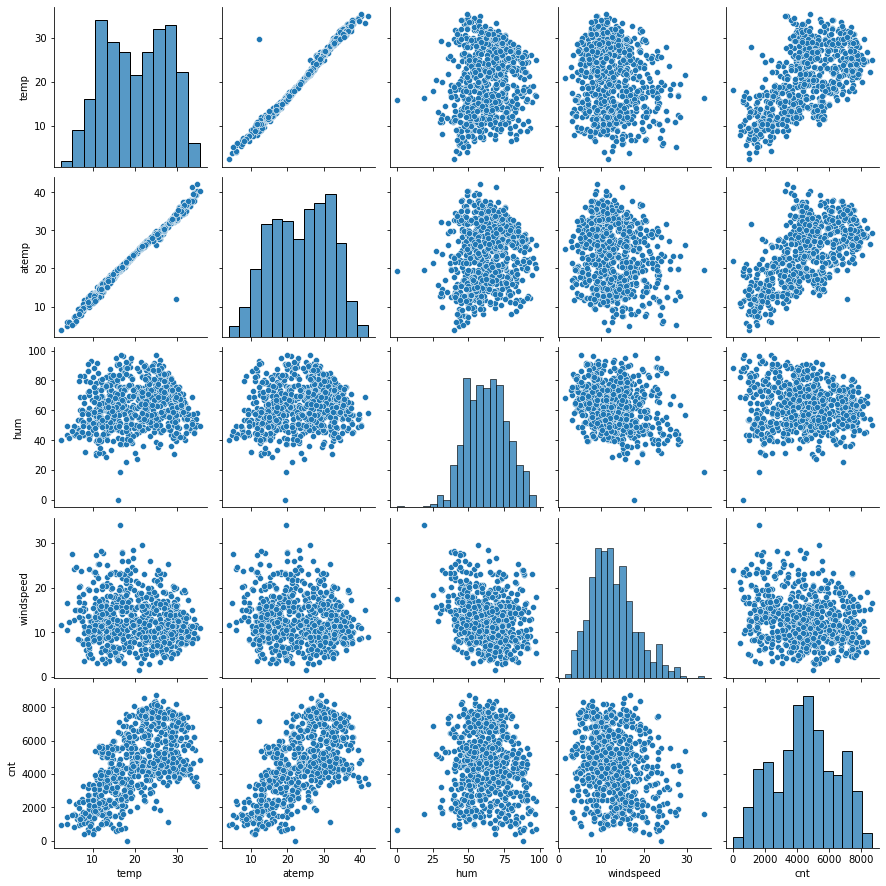

In [145]:
# visualing the numeric variables

sns.pairplot(df[['temp','atemp','hum','windspeed','cnt']])
plt.show()

### Insights:

Here we can observe there are high corelation between temp & atemp with cnt.

<AxesSubplot:>

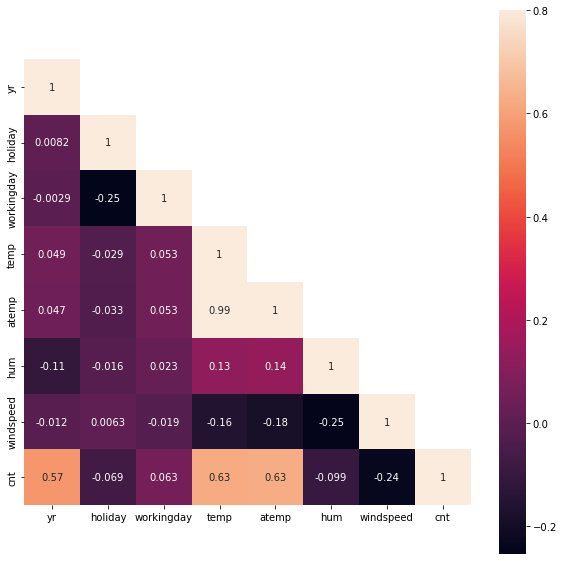

In [146]:
cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

In [147]:
# In the above heat map we can see there are veri high approx 1 co-relation between temp & atemp 
# So we can remove one of them because its a case of multicollinearity

# Removing atemp

df.drop('atemp', axis= 1, inplace= True)

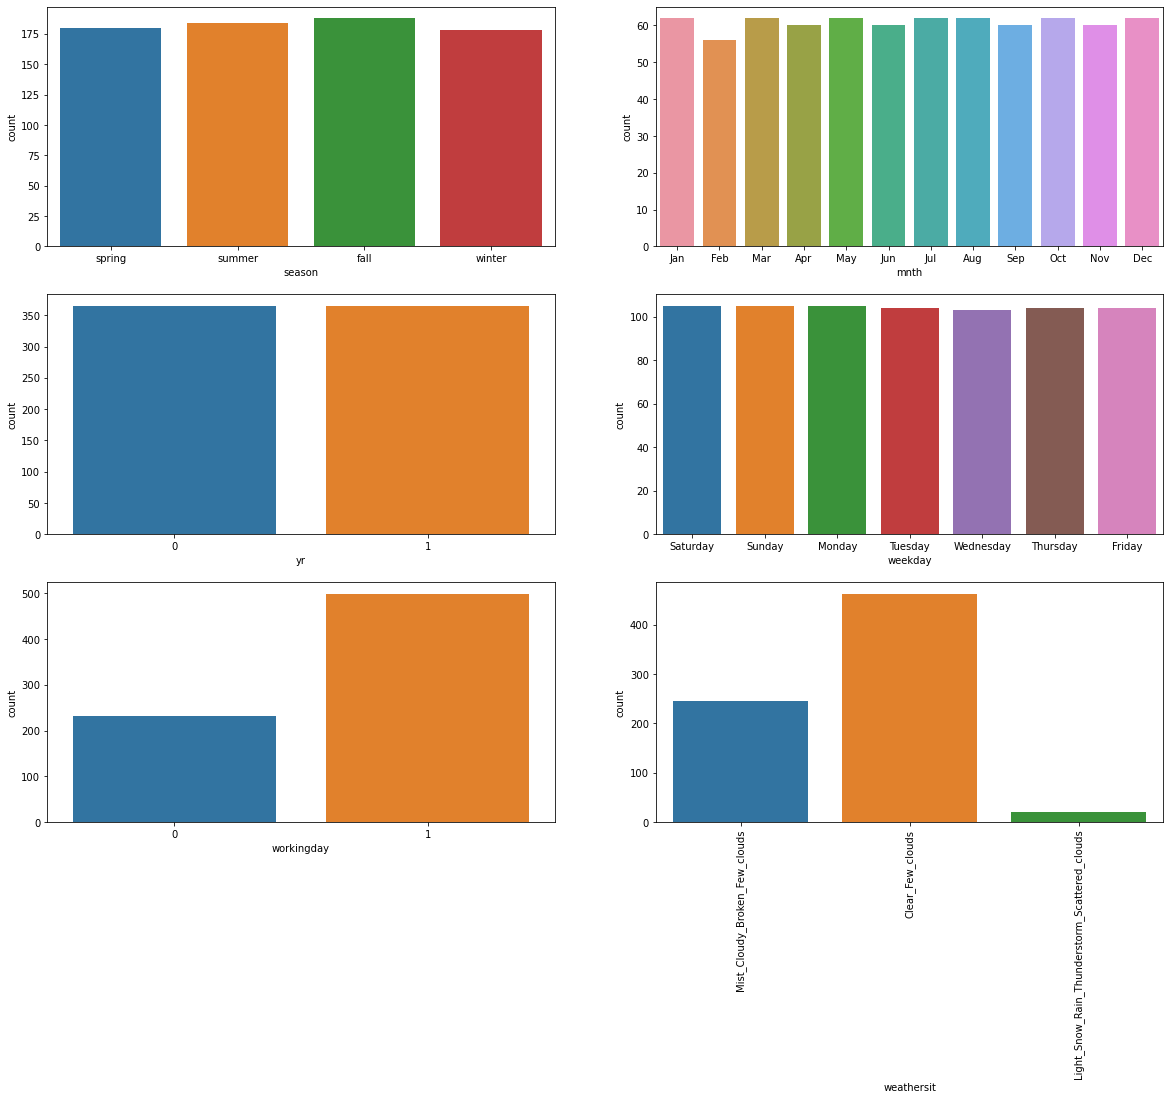

In [148]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
sns.countplot(x = df.season)

plt.subplot(3,2,2)
sns.countplot(x = df.mnth)

plt.subplot(3,2,3)
sns.countplot(x = df.yr)

plt.subplot(3,2,4)
sns.countplot(x = df.weekday)

plt.subplot(3,2,5)
sns.countplot(x = df.workingday)

plt.subplot(3,2,6)
sns.countplot(x = df.weathersit)
plt.xticks(rotation =90)
plt.show()

### Insights:
- Season :- We can observe business was operating similar days in all four seasons.
- Mnth :- We can observe business was operating similar days in months.
- Weekday :- We can observe business was operating similar days in every weekday.
- Weathersit :- We can observe there is no any data for 4th(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
    weather so we can assume company was not working on that season and in 2nd weather (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
    there was approx half demand and in third weather company was operating very less days (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).
- Workingday :- Business was operating more in business day comparison to non working day (holiday).

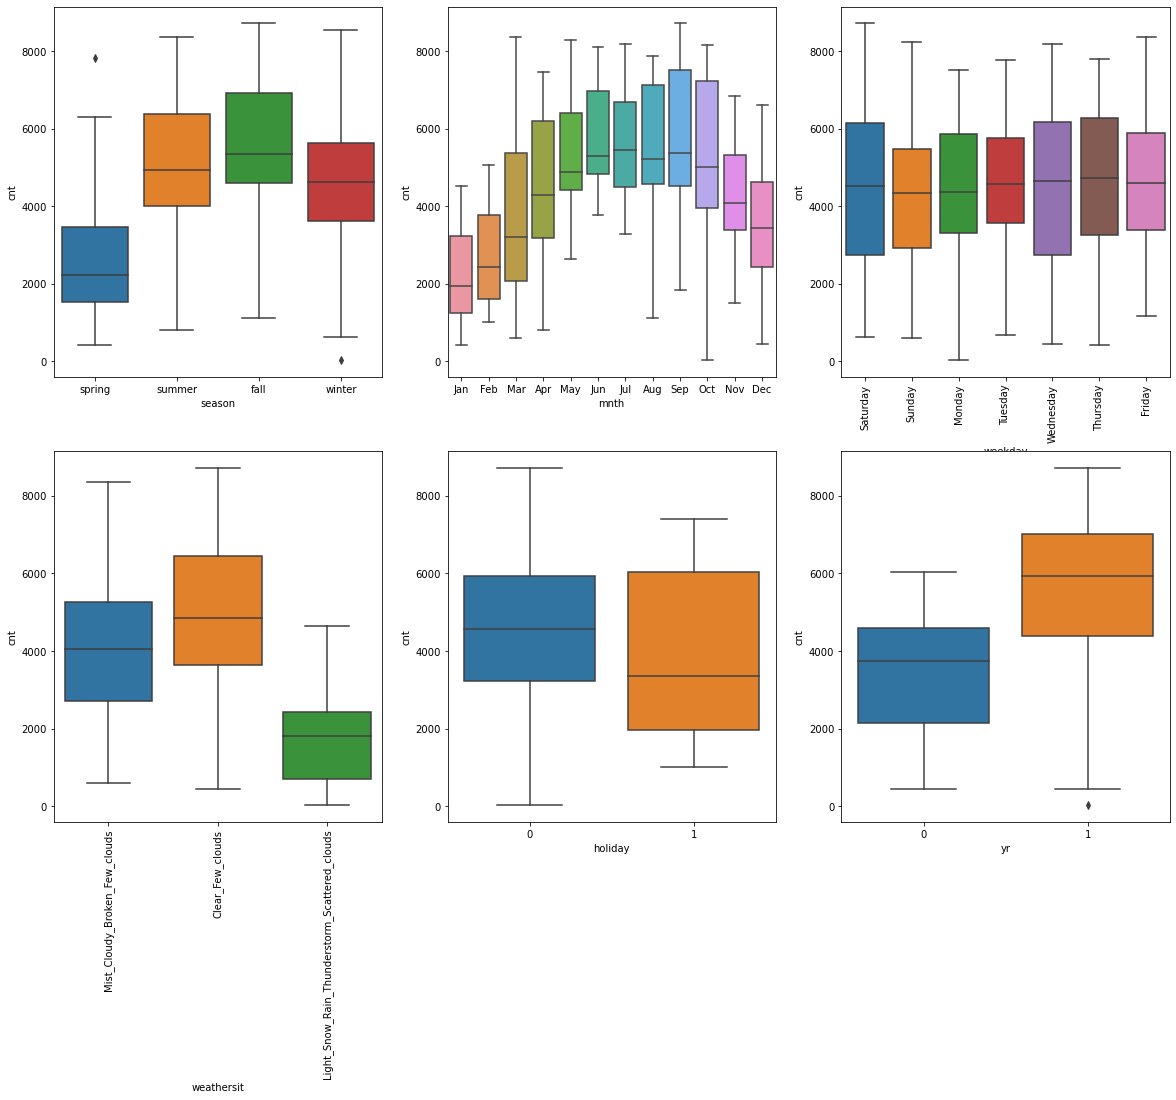

In [149]:
# visualing the categorical variables

plt.figure(figsize=(20,15))
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='season', y='cnt')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='mnth', y='cnt')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='weekday', y='cnt')
plt.xticks(rotation =90)

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='weathersit', y='cnt')
plt.xticks(rotation =90)

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='holiday', y='cnt')

plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='yr', y='cnt')


plt.show()

### Insights:

- How demand is incresing according season summer and fall (High Business Demand) , winter (Medium Business Demand) , spring (Low Business Demand).
- Month wise Aug, Sep, Oct (High Business Demand) , April to July (Medium Business Demand) , Jan to March & Nov, dec ( Low Business Demand). 
- Day wise there are not much effective, approx all day have same median value.
- Weather wise Clear, Few clouds, Partly cloudy, Partly cloudy (High Business demand),  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Medium Business demand) , Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (Low Business demand).
- The working day box plots indicate if day is neither weekend nor holiday more bikes are rent.

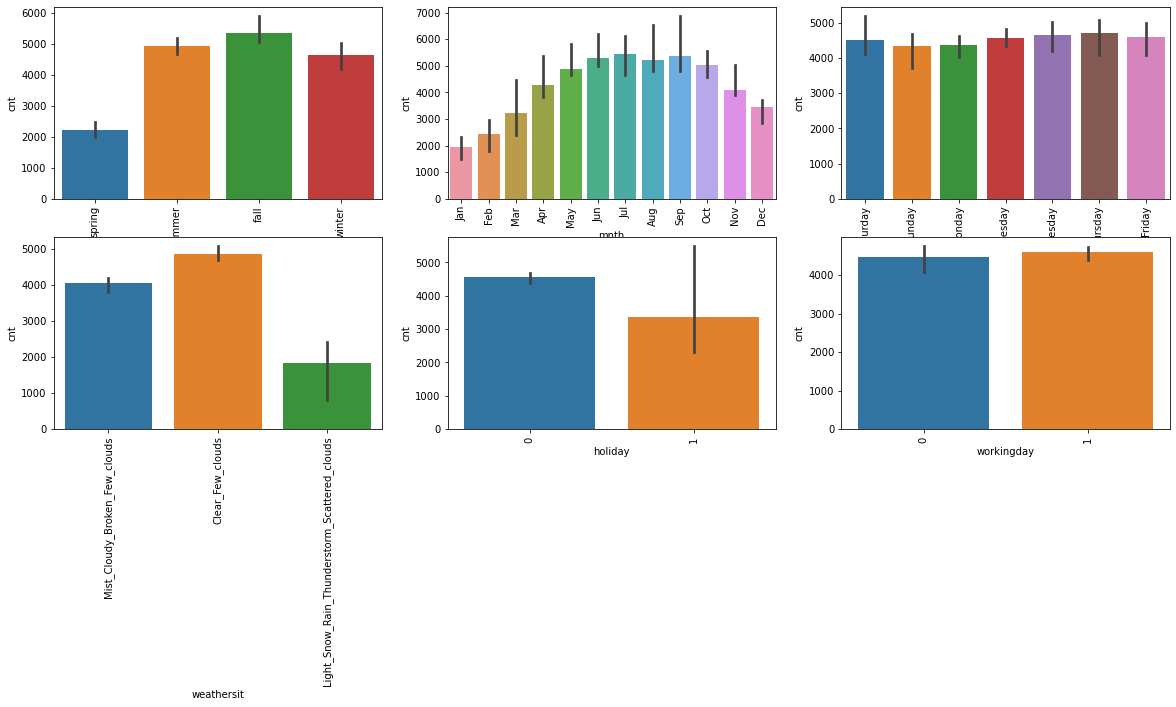

In [150]:
plt.figure(figsize=(20,12))
# Plotting the pie chart for above dataframe

plt.subplot(3,3,1)
plt.xticks(rotation=90)
sns.barplot(x=df['season'],y=df['cnt'],estimator=np.median)

plt.subplot(3,3,2)
plt.xticks(rotation=90)
sns.barplot(x=df['mnth'],y=df['cnt'],estimator=np.median)

plt.subplot(3,3,3)
plt.xticks(rotation=90)
sns.barplot(x=df['weekday'],y=df['cnt'],estimator=np.median)

plt.subplot(3,3,4)
plt.xticks(rotation=90)
sns.barplot(x=df['weathersit'],y=df['cnt'],estimator=np.median)

plt.subplot(3,3,5)
plt.xticks(rotation=90)
sns.barplot(x=df['holiday'],y=df['cnt'],estimator=np.median)

plt.subplot(3,3,6)
plt.xticks(rotation=90)
sns.barplot(x=df['workingday'],y=df['cnt'],estimator=np.median)

plt.show()

### Insights:
- As per weathersit graph, low demand in 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' weather.

### Correlation Analysis

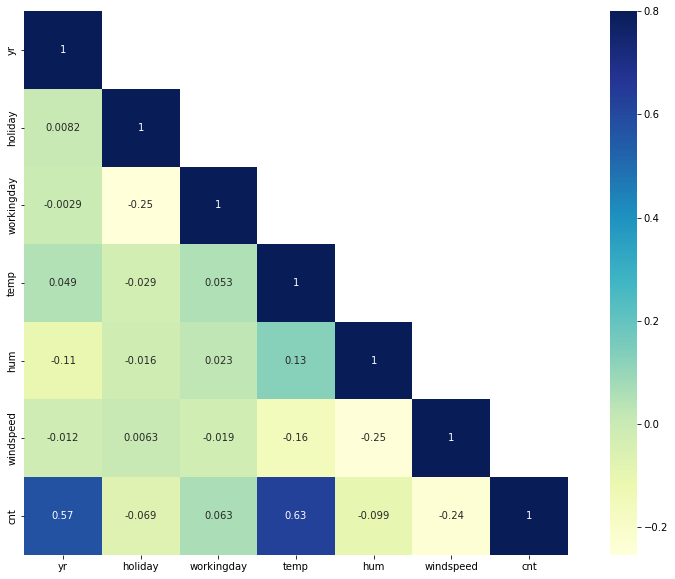

In [151]:
cor = df.corr()
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True, cmap='YlGnBu')
plt.show()

#### Step 2: Preparing the data for modelling (train-test split, rescaling etc)

- Encoding:

    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars
- Splitting into train and test
- Rescaling of variables

#### Dummy variables

In [152]:
# creating dummy vars for furnishingstatus
season_dummy = pd.get_dummies(df['season'])
season_dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


Now, you don't need four columns. You can drop the **fall** column, as the type of season can be identified with just the last three columns where --
- **100** will correspond to **spring**
- **010** will correspond to **summer**
- **001** will correspond to **winter**

In [153]:
# creating dummy vars for season and dropping a redundant variable
season_dummy = pd.get_dummies(df['season'], drop_first=True)
print(season_dummy.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0


In [154]:
# Cocat the dummy df with the origin one
df = pd.concat([df, season_dummy], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy_Broken_Few_clouds,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy_Broken_Few_clouds,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Monday,1,Clear_Few_clouds,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Tuesday,1,Clear_Few_clouds,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Wednesday,1,Clear_Few_clouds,9.305237,43.6957,12.522300,1600,1,0,0


In [155]:
# creating dummy vars for mnth, weekday and weathersit, dropping a redundant variable

mnth_dummy = pd.get_dummies(df['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(df['weekday'], drop_first=True)
weathersit_dummy = pd.get_dummies(df['weathersit'], drop_first=True)


In [156]:
# Cocat the dummy df with the origin one
df = pd.concat([df, mnth_dummy], axis=1)
df = pd.concat([df, weekday_dummy], axis=1)
df = pd.concat([df, weathersit_dummy], axis=1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
0,spring,0,Jan,0,Saturday,0,Mist_Cloudy_Broken_Few_clouds,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sunday,0,Mist_Cloudy_Broken_Few_clouds,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Monday,1,Clear_Few_clouds,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear_Few_clouds,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear_Few_clouds,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [157]:
# drop the season
df.drop('season', axis=1, inplace=True)
df.drop('mnth', axis=1, inplace=True)
df.drop('weekday', axis=1, inplace=True)
df.drop('weathersit', axis=1, inplace=True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Splitting into train and test

In [158]:
df_train, df_test = train_test_split(df, train_size= 0.7, random_state= 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling using MinMaxScaler:
Here we can see that except for __hum__ column, all the columns have small integer values. So it is extremly important to rescale the variables so that they have a comparable scale. 
- Min-Max scaling (Normalisation): Compress/convert your data - Between 0 and 1

In [159]:
# 1. Intantiate an object
scaler = MinMaxScaler()



In [160]:
# find the column those doesn't contain only [0, 1] values

df_temp = df.loc[:, (~df.isin([0,1]).all())]
print(df_temp.columns)
df_temp.info()

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       730 non-null    float64
 1   hum        730 non-null    float64
 2   windspeed  730 non-null    float64
 3   cnt        730 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 22.9 KB


In [161]:
# create a list of numeric vars
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

# 2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [162]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Now as we can see here all max values is 1 and min values is 0 

### Step-3: Training the model

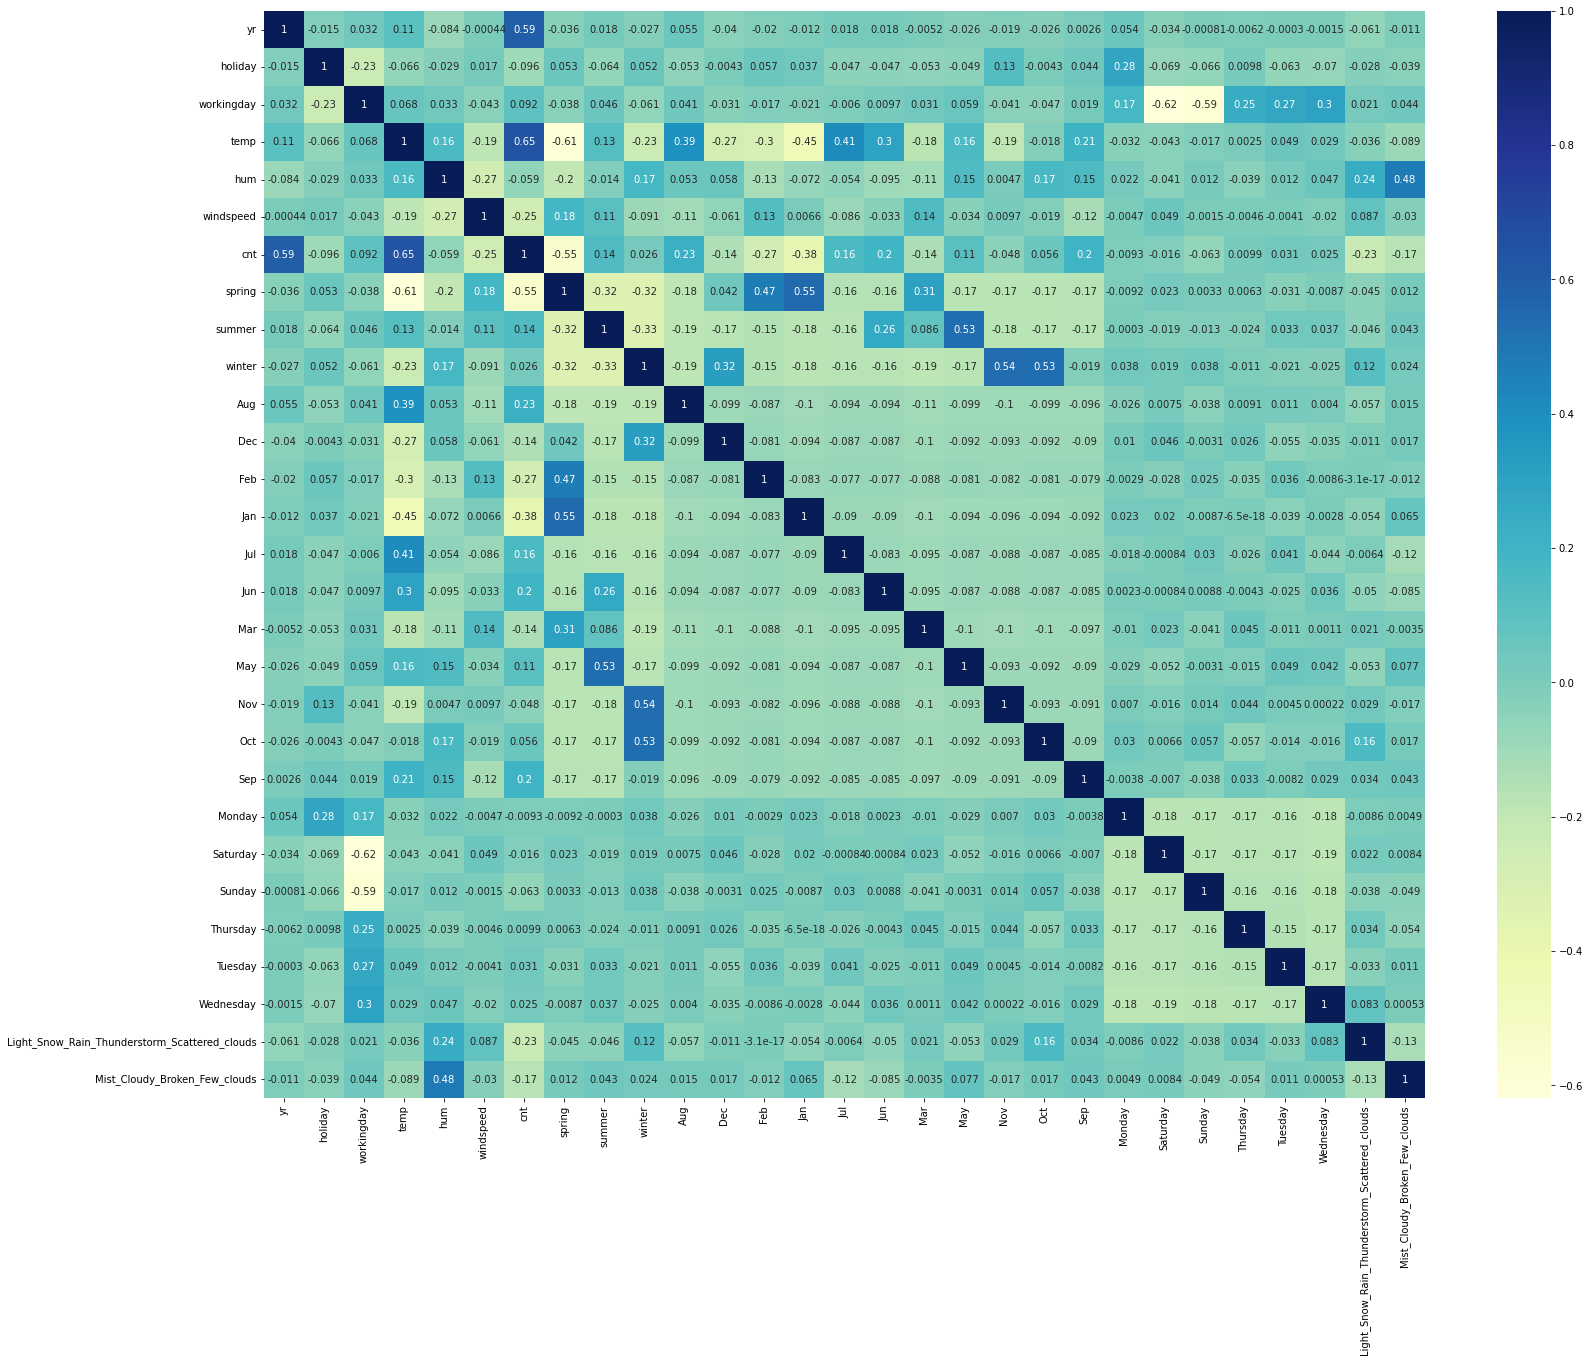

In [163]:
# heatmap

# plt.figure(figsize=(26,20), facecolor='aquamarine')
# sns.heatmap(df_train.corr(), annot= True)
plt.figure(figsize=(26,20))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [164]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [165]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [166]:
print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


### Building our model

#### Till now I come across three ways to train model:
   - Bottom-Up approach (Start from adding single feature and then adding one-by-one other features)
   - Add all variables into model at once and then remove insignificant features one-by-one
   - RFE (Select n number of features and figure out the significant features out of them)
   
#### There are many variables in bikesharing dataset so it is impossible to train model by using first two ways, So RFE is best fit way here to train the model


### RFE

Recursive feature elimination

In [167]:
# Running RFE with the output of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, step = 15)
rfe_model = rfe.fit(X_train, y_train)

In [168]:
list(zip(X_train.columns, rfe_model.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 2),
 ('Sunday', False, 2),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Light_Snow_Rain_Thunderstorm_Scattered_clouds', True, 1),
 ('Mist_Cloudy_Broken_Few_clouds', True, 1)]

In [169]:
rfe_model_support_col = X_train.columns[rfe_model.support_]
rfe_model_support_col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Nov', 'Sep',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')

In [170]:
X_train.columns[~rfe_model.support_]

Index(['workingday', 'Aug', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Build model using statsmodel, for the detailed statistics

In [171]:
# creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_model_support_col]

In [172]:
# Adding a constant variable

X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [173]:
lm = sm.OLS(y_train, X_train_rfe_sm).fit() # Running the linear model


In [174]:
# let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          5.38e-188
Time:                        18:00:50   Log-Likelihood:                 509.49
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     495   BIC:                            -925.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Now we have p-value for all the variables

- p-value is ~0 for all variables, so it means good for prediction
- R-squared is 85%: Which is high and also good for prediction.
- F-statistic(High) and Prob (F-statistic) is ~0, is also good.


In [175]:
# Create a dataframes that will contain all the feature variables names and their VIF values respectively

vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif


,features,VIF
3,hum,30.88
2,temp,16.35
4,windspeed,4.72
5,spring,4.25
7,winter,3.90
6,summer,2.50
13,Mist_Cloudy_Broken_Few_clouds,2.32
0,yr,2.09
10,Nov,1.84
9,Jan,1.74


We have to check below condition:
- High p-value, high VIF
- High-Low:
    - High p-value, low VIF =>> Remove these first
    - Low p-value, high VIF =>> Remove these after the ones above
- Low p-value, low VIF

In [176]:
# First Step to remove High VIF value variable 

X_train_rfe = X_train_rfe.drop(['hum'],axis = 1)

- After remove the 'hum' variable will repeat the process again to check the p-value and VIF values.

In [177]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.23e-185
Time:                        18:00:50   Log-Likelihood:                 501.12
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -915.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2379      0.032      7.373      0.000       0.174       0.301
yr                                                0.2350      0.008     28.586      0.000       0.219       0.251
holiday                                          -0.0907      0.026     -3.460      0.001      -0.142      -0.039
temp                                              0.4248      0.036     11.755      0.000       0.354       0.496
windspeed                                        -0.1591      0.025     -6.263      0.000      -0.209      -0.109
spring                                           -0.0597      0.021     -2.814      0.005      -0.101      -0.018
summer                                            0.0496      0.015      3.400      0.001       0.021       0.078
winter                                            0.0988      0.018      5.628      0.000       0.064       0.133
Dec                                              -0.0434      0.018     -2.429      0.015      -0.078      -0.008
Jan                                              -0.0522      0.018     -2.824      0.005      -0.089      -0.016
Nov                                              -0.0393      0.019     -2.040      0.042      -0.077      -0.001
Sep                                               0.0823      0.016      4.994      0.000       0.050       0.115
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.2926      0.025    -11.803      0.000      -0.341      -0.244
Mist_Cloudy_Broken_Few_clouds                    -0.0787      0.009     -8.994      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       73.264   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.059
Skew:                          -0.742   Prob(JB):                     1.31e-39
Kurtosis:                       5.495   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,windspeed,4.66
2,temp,3.88
6,winter,2.77
4,spring,2.76
0,yr,2.07
5,summer,1.91
9,Nov,1.81
8,Jan,1.65
12,Mist_Cloudy_Broken_Few_clouds,1.56
7,Dec,1.46


### Now we can verify this model to not rfe-support variables and see the impact on the p-value and VIF.

In [179]:
X_train.columns[~rfe_model.support_]

Index(['workingday', 'Aug', 'Feb', 'Jul', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [180]:
list(zip(X_train.columns,rfe_model.support_,rfe_model.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 2),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 2),
 ('Jun', False, 2),
 ('Mar', False, 2),
 ('May', False, 2),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Monday', False, 2),
 ('Saturday', False, 2),
 ('Sunday', False, 2),
 ('Thursday', False, 2),
 ('Tuesday', False, 2),
 ('Wednesday', False, 2),
 ('Light_Snow_Rain_Thunderstorm_Scattered_clouds', True, 1),
 ('Mist_Cloudy_Broken_Few_clouds', True, 1)]

- Here will pick the higher rank which is = 2, as rank 1 variables are already covered.

In [181]:
# Add 'workingday' in the model and check do we have any improvement in model.

X_train_rfe['workingday'] = X_train['workingday']
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,Nov,Sep,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds,workingday
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0,0,1
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,1,1


In [182]:
X_train_rfe_workingday = sm.add_constant(X_train_rfe)
lm_workingday = sm.OLS(y_train, X_train_rfe_workingday).fit()
lm_workingday.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.9
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          2.79e-185
Time:                        18:00:50   Log-Likelihood:                 503.02
No. Observations:                 510   AIC:                            -976.0
Df Residuals:                     495   BIC:                            -912.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2265      0.033      6.923      0.000       0.162       0.291
yr                                                0.2346      0.008     28.604      0.000       0.219       0.251
holiday                                          -0.0790      0.027     -2.942      0.003      -0.132      -0.026
temp                                              0.4235      0.036     11.749      0.000       0.353       0.494
windspeed                                        -0.1573      0.025     -6.201      0.000      -0.207      -0.107
spring                                           -0.0597      0.021     -2.824      0.005      -0.101      -0.018
summer                                            0.0492      0.015      3.380      0.001       0.021       0.078
winter                                            0.0998      0.018      5.702      0.000       0.065       0.134
Dec                                              -0.0434      0.018     -2.441      0.015      -0.078      -0.008
Jan                                              -0.0522      0.018     -2.833      0.005      -0.088      -0.016
Nov                                              -0.0402      0.019     -2.094      0.037      -0.078      -0.002
Sep                                               0.0816      0.016      4.969      0.000       0.049       0.114
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.2942      0.025    -11.891      0.000      -0.343      -0.246
Mist_Cloudy_Broken_Few_clouds                    -0.0794      0.009     -9.091      0.000      -0.097      -0.062
workingday                                        0.0173      0.009      1.926      0.055      -0.000       0.035
==============================================================================
Omnibus:                       69.673   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.933
Skew:                          -0.678   Prob(JB):                     4.22e-41
Kurtosis:                       5.629   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,4.80
3,windspeed,4.66
13,workingday,3.20
4,spring,2.89
6,winter,2.80
0,yr,2.07
5,summer,1.96
9,Nov,1.82
8,Jan,1.65
12,Mist_Cloudy_Broken_Few_clouds,1.57


### Here we can see some details after adding 'workingday'

- p-value is high for workingday
- R-adjusted and R-squared not increasing so much
- VIF effect for other is high

In [184]:
# So our decision to remove "workingday" is right as per the above observation.

X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [185]:
# Add 'workingday' in the model and check do we have any improvement in model.

X_train_rfe['Aug'] = X_train['Aug']
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,Nov,Sep,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds,Aug
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1,0
728,1,0,0.245101,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.380981,0,1,0,0,0,0,0,0,1,0


In [186]:
X_train_rfe_aug = sm.add_constant(X_train_rfe)
lm_aug = sm.OLS(y_train, X_train_rfe_aug).fit()
lm_aug.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.5
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.41e-185
Time:                        18:00:50   Log-Likelihood:                 503.73
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     495   BIC:                            -913.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2178      0.033      6.534      0.000       0.152       0.283
yr                                                0.2344      0.008     28.604      0.000       0.218       0.250
holiday                                          -0.0903      0.026     -3.458      0.001      -0.142      -0.039
temp                                              0.4277      0.036     11.876      0.000       0.357       0.498
windspeed                                        -0.1580      0.025     -6.242      0.000      -0.208      -0.108
spring                                           -0.0406      0.023     -1.785      0.075      -0.085       0.004
summer                                            0.0686      0.017      4.086      0.000       0.036       0.102
winter                                            0.1156      0.019      6.083      0.000       0.078       0.153
Dec                                              -0.0412      0.018     -2.312      0.021      -0.076      -0.006
Jan                                              -0.0511      0.018     -2.772      0.006      -0.087      -0.015
Nov                                              -0.0368      0.019     -1.914      0.056      -0.075       0.001
Sep                                               0.0973      0.018      5.495      0.000       0.063       0.132
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.2908      0.025    -11.770      0.000      -0.339      -0.242
Mist_Cloudy_Broken_Few_clouds                    -0.0805      0.009     -9.206      0.000      -0.098      -0.063
Aug                                               0.0402      0.018      2.257      0.024       0.005       0.075
==============================================================================
Omnibus:                       69.227   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.945
Skew:                          -0.699   Prob(JB):                     7.58e-38
Kurtosis:                       5.467   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
2,temp,5.09
3,windspeed,4.68
6,winter,3.04
4,spring,2.98
5,summer,2.39
0,yr,2.08
9,Nov,1.81
13,Aug,1.72
8,Jan,1.65
12,Mist_Cloudy_Broken_Few_clouds,1.59


### Here we can see some details after adding 'Aug'

- p-value is low for Aug
- R-adjusted and R-squared not increasing
- VIF effect for other is high

So will remove the 'Aug' variable.

In [188]:
# So our decision to remove "Aug" is right as per the above observation.

X_train_rfe = X_train_rfe.drop(['Aug'], axis=1)

In [189]:
X_train_rfe.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Dec', 'Jan', 'Nov', 'Sep',
       'Light_Snow_Rain_Thunderstorm_Scattered_clouds',
       'Mist_Cloudy_Broken_Few_clouds'],
      dtype='object')

In [190]:
X_train_rfe_sm_final = sm.add_constant(X_train_rfe)
lm_final = sm.OLS(y_train,X_train_rfe_sm_final).fit()
lm_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.23e-185
Time:                        18:00:50   Log-Likelihood:                 501.12
No. Observations:                 510   AIC:                            -974.2
Df Residuals:                     496   BIC:                            -915.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.2379      0.032      7.373      0.000       0.174       0.301
yr                                                0.2350      0.008     28.586      0.000       0.219       0.251
holiday                                          -0.0907      0.026     -3.460      0.001      -0.142      -0.039
temp                                              0.4248      0.036     11.755      0.000       0.354       0.496
windspeed                                        -0.1591      0.025     -6.263      0.000      -0.209      -0.109
spring                                           -0.0597      0.021     -2.814      0.005      -0.101      -0.018
summer                                            0.0496      0.015      3.400      0.001       0.021       0.078
winter                                            0.0988      0.018      5.628      0.000       0.064       0.133
Dec                                              -0.0434      0.018     -2.429      0.015      -0.078      -0.008
Jan                                              -0.0522      0.018     -2.824      0.005      -0.089      -0.016
Nov                                              -0.0393      0.019     -2.040      0.042      -0.077      -0.001
Sep                                               0.0823      0.016      4.994      0.000       0.050       0.115
Light_Snow_Rain_Thunderstorm_Scattered_clouds    -0.2926      0.025    -11.803      0.000      -0.341      -0.244
Mist_Cloudy_Broken_Few_clouds                    -0.0787      0.009     -8.994      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       73.264   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.059
Skew:                          -0.742   Prob(JB):                     1.31e-39
Kurtosis:                       5.495   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
vif = pd.DataFrame()
vif['feature'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i ) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values('VIF', ascending=False)
vif

,feature,VIF
3,windspeed,4.66
2,temp,3.88
6,winter,2.77
4,spring,2.76
0,yr,2.07
5,summer,1.91
9,Nov,1.81
8,Jan,1.65
12,Mist_Cloudy_Broken_Few_clouds,1.56
7,Dec,1.46



#### So, now we can see after removing the variable our R-squared and Adj. RSquared is decreasing so we won't remove it further and below are the final variables:
- windspeed
- temp
- winter
- spring
- yr
- summer
- Nov
- Jan
- Mist_Cloudy_Broken_Few_clouds
- Dec
- Sep
- Light_Snow_Rain_Thunderstorm_Scattered_clouds
- holiday

All above variables have VIF(< 5) and p-value(< 0.05), so we can say these all variables good for model predictor’s.

### Step-4: Residual analysis


In [192]:
y_train_pred = lm_final.predict(X_train_rfe_sm_final)

<AxesSubplot:ylabel='Density'>

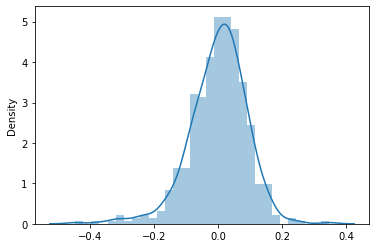

In [193]:
res = y_train - y_train_pred
sns.distplot(res)

### Step-5: Predictions and Evaluation on the Test Set


In [194]:
# create a list of numeric vars
num_vars = ['temp','hum','windspeed','cnt']

# 2. Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [195]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [196]:
## Divide into X_test data & y_test data 

y_test = df_test.pop('cnt')
X_test = df_test


In [197]:
# add a constant

X_test_sm = X_test[X_train_rfe.columns]

X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,spring,summer,winter,Dec,Jan,Nov,Sep,Light_Snow_Rain_Thunderstorm_Scattered_clouds,Mist_Cloudy_Broken_Few_clouds
184,1.0,0,1,0.831783,0.084219,0,0,0,0,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0,0


In [198]:
# predict 
# y_test_pred = lm_final.predict(X_test_sm)

y_test_pred = lm_final.predict(X_test_sm)

In [199]:
# evaluate
r2_score_test = r2_score(y_true= y_test, y_pred=y_test_pred)
r2_score_test

0.8119338251392612

In [200]:
N= len(X_test) 
final_variables = list(lm_final.params.index)
final_variables.remove('const')
independent_var_count =len(final_variables) # Number of independent variables

r2_test_adj = round((1-((1-r2_score_test)*(N-1)/(N-independent_var_count-1))), 3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj, 3))

Adj. R-Squared for Test dataset:  0.8


Text(0, 0.5, 'y_pred')

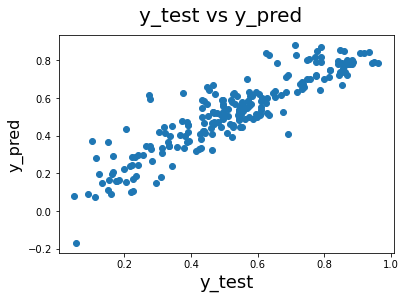

In [201]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

# Significant variables to predict the demand for shared bikes

- summer
- holiday
- temp
- windspeed
- season(spring, winter)
- year(Dec, Jan, Nov, Sep)
- weathersit(Light_Snow_Rain_Thunderstorm_Scattered_clouds, Mist_Cloudy_Broken_Few_clouds)


In [202]:
# Coefficent for the variables are define here

round(lm_final.params, 3)

const                                            0.238
yr                                               0.235
holiday                                         -0.091
temp                                             0.425
windspeed                                       -0.159
spring                                          -0.060
summer                                           0.050
winter                                           0.099
Dec                                             -0.043
Jan                                             -0.052
Nov                                             -0.039
Sep                                              0.082
Light_Snow_Rain_Thunderstorm_Scattered_clouds   -0.293
Mist_Cloudy_Broken_Few_clouds                   -0.079
dtype: float64

## Equation for best fit line as below:
cnt = 0.238 + (0.235*yr) - (0.091 * holiday) + (0.425 * temp) - (0.159 * windspeed) - (0.060 * spring) + (0.050 * summer) + (0.099 * winter) - (0.043 * Dec) - (0.052 * Jan) - (0.039 * Nov) + (0.082 * Sep) - (0.293 * Light_Snow_Rain_Thunderstorm_Scattered_clouds) - (0.079 * Mist_Cloudy_Broken_Few_clouds)

- Coefficients of the variable will explain the factor effecting the bike demand.
    - Train Set R2-Score is            :  0.837
    - Test Set R2-Score is             :  0.811
    - Train Set Adj-R-square is        :  0.832
    - Adj. R-Squared for Test dataset  :  0.8

- Here we can say R-squared and Adj R-squared value for both Training & Test dataset can explain more that 80% of bike demand. 



## Top 3 features contributing towards explaining the demand of the shared bikes as follows:

- temp - Positive Corelation
- yr(Year) - Postive Corelation
- weathersit(Light_Snow_Rain_Thunderstorm_Scattered_clouds & Mist_Cloudy_Broken_Few_clouds) - Negative Co-relation


### Thank you :)